In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e14/sample_submission.csv
/kaggle/input/playground-series-s3e14/train.csv
/kaggle/input/playground-series-s3e14/test.csv


![Random forest](https://mljar.com/images/machine-learning/random_forest_logo.png)

# Training and test Data

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')

In [3]:
train_df.head(5)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


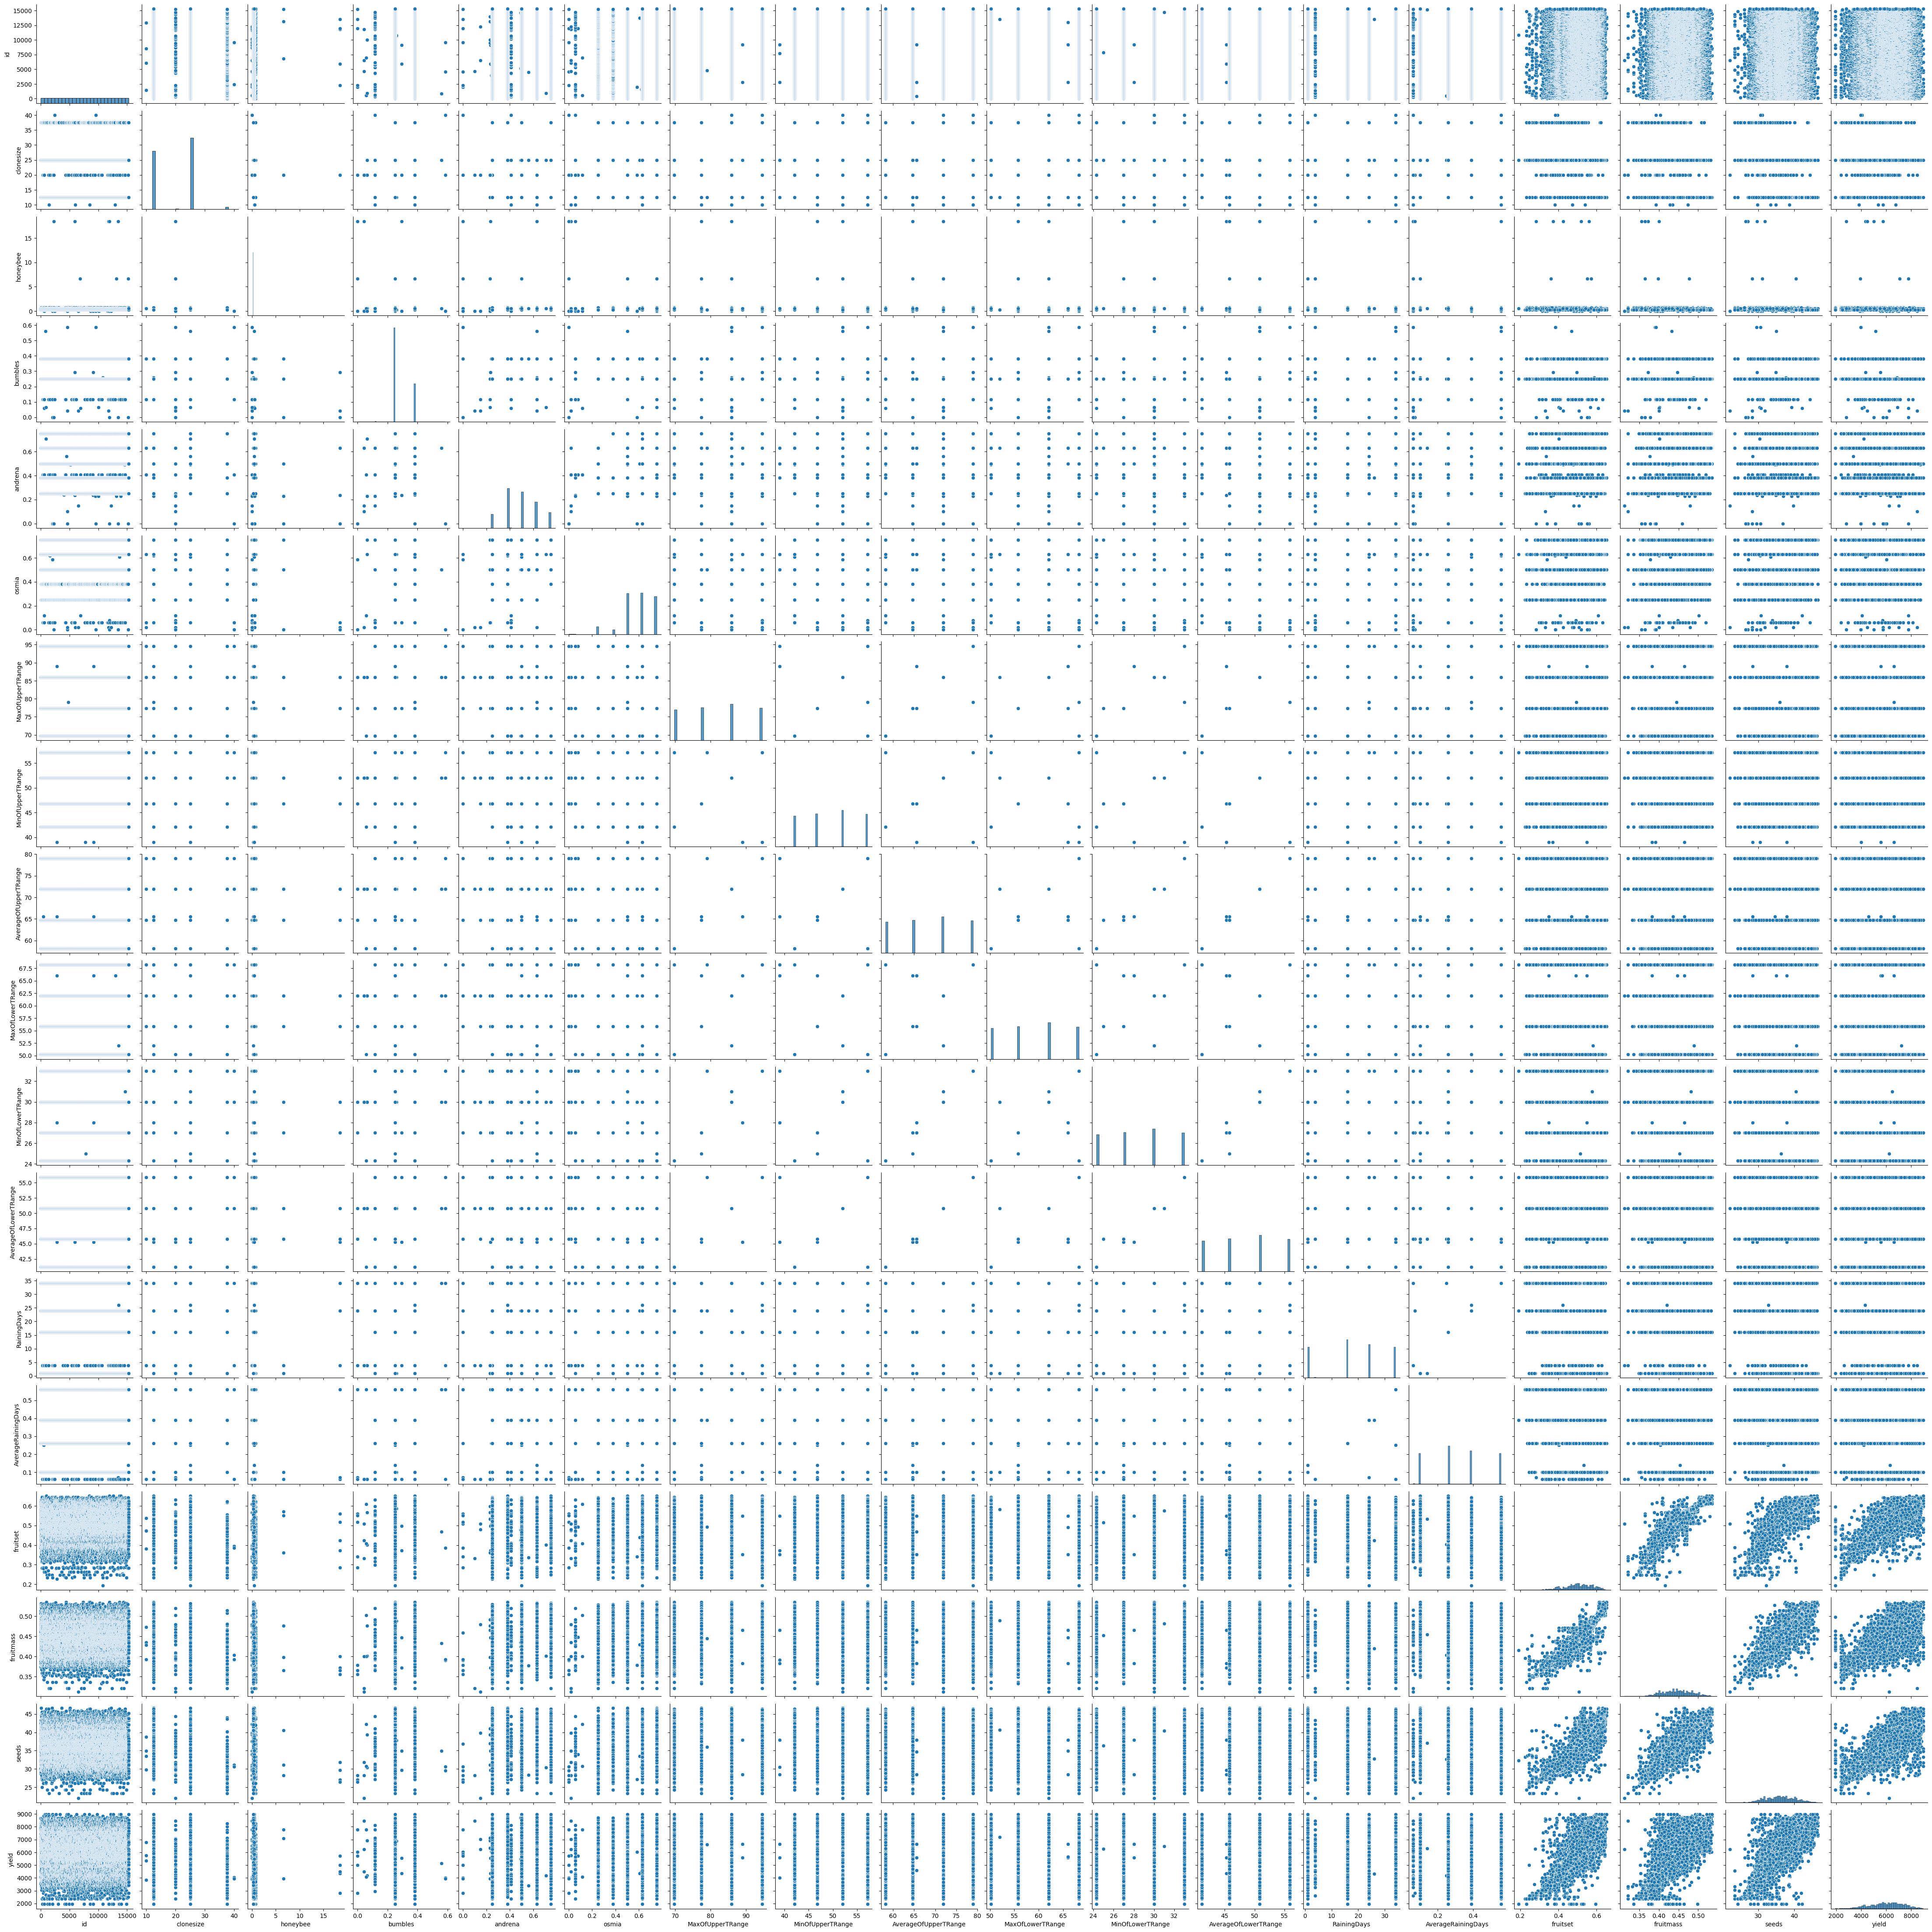

In [5]:
sns.pairplot(data=train_df)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [8]:
X = train_df.drop(['yield','id'],axis=1)

In [9]:
len(X.columns)

16

In [10]:
y = train_df['yield']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest architecture
![Random forest](https://www.tutorialandexample.com/wp-content/uploads/2019/10/Working-of-Random-Forest.png)

In [12]:
n_estimators = [64,100,128,200]
max_features = [1,3,5,7,9,11,13,15]
bootstrap = [True]
oob_score = [True,False]

In [13]:
param_grid = {'n_estimators':n_estimators,
            'max_features':max_features,
            'bootstrap':bootstrap,
            'oob_score':oob_score}

In [14]:
rfc = RandomForestRegressor()

In [15]:
grid = GridSearchCV(rfc,param_grid,error_score="raise")

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [17]:
grid.best_params_

{'bootstrap': True, 'max_features': 7, 'n_estimators': 200, 'oob_score': True}

# Best fit for this data

In [18]:
rfc = RandomForestRegressor(bootstrap=True,max_features=7,n_estimators=200,oob_score=False)

In [19]:
rfc.fit(X_train,y_train)

RandomForestRegressor(max_features=7, n_estimators=200)

In [20]:
pred = rfc.predict(X_test)
pred

array([7331.82024385, 6828.8460085 , 4328.4990413 , ..., 7399.64020825,
       4702.18911025, 6319.0298453 ])

In [21]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute error

In [22]:
mse = mean_absolute_error(y_test,pred)
mse

362.38017748309176

# Prediction on test data 

In [23]:
test_df = test_df.drop('id',axis=1)

In [24]:
pred = rfc.predict(test_df)
pred

array([4286.35035015, 6073.4061155 , 7080.81815123, ..., 6485.25395095,
       4423.69137995, 7195.82831655])

In [25]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e14/sample_submission.csv')
submission.head(10)

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194
5,15294,6025.194
6,15295,6025.194
7,15296,6025.194
8,15297,6025.194
9,15298,6025.194


In [26]:
submission['yield'] = pred
submission.head()

,id,yield
0,15289,4286.350350
1,15290,6073.406116
2,15291,7080.818151
3,15292,4634.409206
4,15293,3785.035984


In [27]:
submission.to_csv('submission.csv', index=False)